In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-gmres-intro)

We define a triangular matrix with known eigenvalues and a random vector $\mathbf{b}$.

In [2]:
λ = @. 10 + (1:100)
A = triu(rand(100, 100), 1) + diagm(λ)
b = rand(100);

Instead of building the Krylov matrices, we use the Arnoldi iteration to generate equivalent orthonormal vectors.

In [3]:
Q, H = FNC.arnoldi(A, b, 60);

The Arnoldi bases are used to solve the least-squares problems defining the GMRES iterates.

In [4]:
resid = [norm(b); zeros(60)]
for m in 1:60
    s = [norm(b); zeros(m)]
    z = H[1:m+1, 1:m] \ s
    x = Q[:, 1:m] * z
    resid[m+1] = norm(b - A * x)
end

The approximations converge smoothly, practically all the way to machine epsilon.

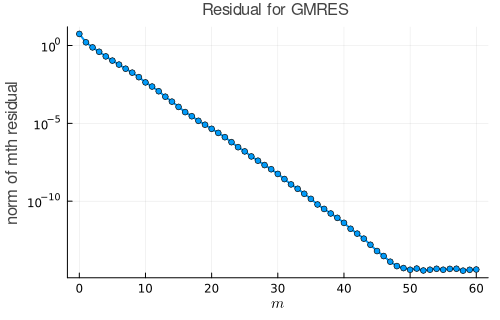

In [5]:
plot(0:60, resid, m=:o,
    xaxis=(L"m"),  yaxis=(:log10, "norm of mth residual"),
    title="Residual for GMRES",  legend=:none)